<a href="https://colab.research.google.com/github/varvara007/yandex/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE_%D1%80%D0%BE%D1%81%D1%81%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%BC_%D0%BA%D0%B8%D0%BD%D0%BE%D0%BF%D1%80%D0%BE%D0%BA%D0%B0%D1%82%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

# Задача

Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.
Будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

In [ ]:
#импортируем нужные библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:

mkrf_movies=pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_shows=pd.read_csv('/datasets/mkrf_shows.csv')

display(mkrf_movies.head())
mkrf_movies.info()
display(mkrf_shows.head())
mkrf_shows.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


# Описание данных:
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.
Cтолбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.


Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

Объединять  две таблицы будем по столбцу puNumber, для этого необходимо, чтобы у puNumber был одинаковый тип данных. Однако   у них разных тип данных. Mkrf_shows у puNumber тип int64, Mkrf_movies тип object. Преобразуем puNumber mkrf_movies на тип int.

In [ ]:
display(mkrf_shows.head())
mkrf_shows.info()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [ ]:
mkrf_movies = mkrf_movies[~mkrf_movies['puNumber'].str.contains('нет')]
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype(int)

In [ ]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Объединим две таблицы

In [ ]:
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

 </font><font color='Blue'><b>Комментарий студента</b></font><br>
 Сделаем проверку, что все данные корректно объединились.

In [ ]:
mkrf_movies.shape

(7485, 15)

In [ ]:
mkrf_shows.shape

(3158, 2)

In [ ]:
data.shape

(7485, 16)

In [ ]:
mkrf_movies[~mkrf_movies['puNumber'].isin(data['puNumber'])].count()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
dtype: int64

# Вывод
Все объекты из датасета mkrf_movies вошли в получившийся датафрейм. Количество объектов осталось прежним, и так как использовался left, все объекты из mkrf_movies сохранились, но данные из mkrf_shows неполные, есть  информация не обо всех фильмах. Подсчитали сколько фильмом не вошли и получили 0.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

 show_start_date и ratings имеют тип object.

Поменяем их тип данных, так как ratings может понадобиться для сравнений рейтингов у фильмов. С датами легче работать, когда они в формате даты.

In [ ]:
# Переведем значения в столбце show_start_date в формат даты:
data['show_start_date']=pd.to_datetime(data['show_start_date'])

# Изменим тип данных столбца ratings:
data['ratings']=pd.to_numeric(data['ratings'],errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [ ]:
# Комментарий ревьюера
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7485

In [ ]:
# Определение пропущенных значений
missing_values = data.isnull().sum()

# Вывод столбцов с пропущенными значениями
print(missing_values[missing_values > 0])

film_studio                18
production_country          2
director                    9
producer                  568
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64


In [ ]:
data = data.dropna(subset=['film_studio'])
 # Определение пропущенных значений
missing_values = data.isnull().sum()

# Вывод столбцов с пропущенными значениями
print(missing_values[missing_values > 0])

production_country          1
director                    8
producer                  567
refundable_support       7135
nonrefundable_support    7135
budget                   7135
financing_source         7135
ratings                   982
genres                    962
box_office               4310
dtype: int64


In [ ]:
data = data.dropna(subset=['production_country'])
 # Определение пропущенных значений
missing_values = data.isnull().sum()

# Вывод столбцов с пропущенными значениями
print(missing_values[missing_values > 0])

director                    8
producer                  567
refundable_support       7134
nonrefundable_support    7134
budget                   7134
financing_source         7134
ratings                   982
genres                    962
box_office               4310
dtype: int64


In [ ]:
data = data.dropna(subset=['director'])
 # Определение пропущенных значений
missing_values = data.isnull().sum()

# Вывод столбцов с пропущенными значениями
print(missing_values[missing_values > 0])

producer                  564
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source         7126
ratings                   976
genres                    956
box_office               4303
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7458 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7458 non-null   object             
 1   puNumber               7458 non-null   int64              
 2   show_start_date        7458 non-null   datetime64[ns, UTC]
 3   type                   7458 non-null   object             
 4   film_studio            7458 non-null   object             
 5   production_country     7458 non-null   object             
 6   director               7458 non-null   object             
 7   producer               6894 non-null   object             
 8   age_restriction        7458 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Удалили строки с столбцами у которых малое количество пропусков: film_studio, production_country, director.

In [ ]:
 # Определение пропущенных значений
missing_values = data.isnull().sum()

# Вывод столбцов с пропущенными значениями
print(missing_values[missing_values > 0])

producer                  564
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source         7126
ratings                   976
genres                    956
box_office               4303
dtype: int64


In [ ]:
data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)

Заполним 'refundable_support' и 'nonrefundable_support' 0. Так как скорее всего это фильмы, на которые не тратились государственные деньги.

In [ ]:
 # Определение пропущенных значений
missing_values = data.isnull().sum()

# Вывод столбцов с пропущенными значениями
print(missing_values[missing_values > 0])

producer             564
budget              7126
financing_source    7126
ratings              976
genres               956
box_office          4303
dtype: int64


# Вывод
Были удалены строки, у которых не было известно об film_studio, production_country, director, так как там было мало пропусков.
Об остальных:
- producer: не указан для 564 фильмах - оставим как есть;
- только у 332 фильмов есть информация о бюджете фильма. Это связано с тем, что для фильмов, которые не получали государственную поддержку, данные о бюджете не указаны. Оставим пропуски как есть;
- ratings: для 976 фильмов рейтинги не указаны - оставим пропуски как есть;
- genres: 956 фильмов остались без информации о жанре - оставим пропуски как есть;
- box_office: 4303 записей о кассовых сборах не заполнены. Возможно произошел сбой в выгрузке информации. Также оставим пропуски, чтобы не было искажения информации о кассовых сборах.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

# Проверим на явные дубликаты:
data.duplicated().sum()

 </font><font color='Blue'><b>Комментарий студента</b></font><br>
    Была сделана проверка явных дубликатов. Явных дубликатов не обнаружилось.

In [ ]:
# Проверка на полные дубликаты
duplicates = data.duplicated()

# Выводим дубликаты
print("Дубликаты:")
print(data[duplicates])

Дубликаты:
Empty DataFrame
Columns: [title, puNumber, show_start_date, type, film_studio, production_country, director, producer, age_restriction, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres, box_office]
Index: []


In [ ]:
# Проверим теперь, есть ли дубликаты в столбце с номером прокатного удостоверения:
data['puNumber'].duplicated().sum()

2

In [ ]:
data[data.duplicated(subset=['puNumber'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,NaN,6.8,"комедия,криминал",NaN


Номер прокатного удостоверения должен быть индивидуальный у каждого фильма. Повторений быть не должно.

In [ ]:
# Удаление дубликатов из столбца
data = data[data['puNumber'] != 221154310]
data = data[data['puNumber'] != 221054410]

In [ ]:
data[data.duplicated(subset=['puNumber'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [ ]:
#Проверим теперь, есть ли дубликаты в столбце с названием
#data['title'].duplicated().sum()

In [ ]:
#data = data.drop_duplicates(subset = ['title','puNumber'], keep ='first')

</font><font color='Blue'><b>Комментарий студента</b></font><br>  
Были закомментрированы удаления фильмов с одинаковыми названиями.

In [ ]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета и финансовых данных
data_set = data.copy()           # создаем копию текущего датасета
a, b  = len(temp), len(data_set)
print(f'Количество строк исходное {a}, Количество строк после обработки {b}, % потерянных строк', round((a-b)/a*100, 2))
fin_list = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']
for i in fin_list:
    temp1, temp2 = data_set[i].sum(), temp[i].sum()
    print(f'Колонка {i}: сумма исходная {temp1}, сумма после обработки {temp2}, % потерь', round((temp2-temp1)/temp2*100, 2))

Количество строк исходное 7485, Количество строк после обработки 7454, % потерянных строк 0.41
Колонка refundable_support: сумма исходная 3939000000.0, сумма после обработки 3939000000.0, % потерь 0.0
Колонка nonrefundable_support: сумма исходная 16261688312.0, сумма после обработки 16261688312.0, % потерь 0.0
Колонка budget: сумма исходная 42240265939.0, сумма после обработки 42240265939.0, % потерь 0.0
Колонка box_office: сумма исходная 241519442375.13, сумма после обработки 241519722477.13, % потерь 0.0


In [ ]:
data[data.duplicated(subset=['title'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,0.0,0.0,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.5,"триллер,драма",175003.51
7449,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7454 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7454 non-null   object             
 1   puNumber               7454 non-null   int64              
 2   show_start_date        7454 non-null   datetime64[ns, UTC]
 3   type                   7454 non-null   object             
 4   film_studio            7454 non-null   object             
 5   production_country     7454 non-null   object             
 6   director               7454 non-null   object             
 7   producer               6890 non-null   object             
 8   age_restriction        7454 non-null   object             
 9   refundable_support     7454 non-null   float64            
 10  nonrefundable_support  7454 non-null   float64            
 11  budget                 332 non-null    float64          

# Вывод
Всевозможные дубликаты были удалены.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [ ]:
data['type'] = data['type'].str.strip()

In [ ]:
data.describe(include = 'object')

,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres
count,7454,7454,7454,7454,7454,6890,7454,332,6498
unique,6744,6,5484,950,4795,5328,5,3,741
top,День святого Валентина_,Художественный,"Киностудия ""Мосфильм""",США,О.Семёнова,П.Смирнов,«16+» - для детей старше 16 лет,Министерство культуры,драма
freq,5,5893,341,2170,47,67,2845,164,476


In [ ]:
data['production_country']=data['production_country'].replace(' ','', regex=True)

In [ ]:
for col in ['title', 'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'financing_source', 'genres']:
  data[col] = data[col].str.replace(r'[^а-яА-Яa-zA-Z0-9!&?.,+()-/ ]', '', regex=True)

 </font><font color='Blue'><b>Комментарий студента</b></font><br>
    Были удалены лишние пробелы, а также были удалены лишние знаки пунктуации, как например День святого Валентина_, что уменьшить количество дубликатов.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [ ]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.454000e+03,7.454000e+03,7.454000e+03,3.320000e+02,6478.000000,3.155000e+03
mean,1.351683e+08,5.284411e+05,2.181606e+06,1.272297e+08,6.478466,7.655133e+07
std,3.831768e+07,5.793403e+06,1.618294e+07,1.885883e+08,1.101688,2.404559e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.130001e+08,0.000000e+00,0.000000e+00,4.200000e+07,5.900000,8.709050e+04
50%,1.210155e+08,0.000000e+00,0.000000e+00,6.864992e+07,6.600000,2.338050e+06
75%,1.240032e+08,0.000000e+00,0.000000e+00,1.419853e+08,7.200000,2.399546e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09


In [ ]:
# Создадим столбец с годом премьеры фильма:
data['year']=pd.DatetimeIndex(data['show_start_date']).year
display(data.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+ - запрещено для детей,0.0,0.0,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,Киностудия Мосфильм,СССР,Е.Матвеев,NaN,6+ - для детей старше 6 лет,0.0,0.0,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+ - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+ - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+ - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


In [ ]:
data.groupby('year')['title'].count()


year
2010    976
2011    620
2012    592
2013    629
2014    805
2015    705
2016    817
2017    505
2018    879
2019    926
Name: title, dtype: int64

In [ ]:
data.shape

(7454, 17)

In [ ]:
data.groupby('year')['title'].count().reset_index()['title'].mean()

745.4

In [ ]:
data.groupby('year')['title'].describe()

,count,unique,top,freq
year,,,,
2010,976,812,День святого Валентина,5
2011,620,556,Хочу как ты,3
2012,592,555,Морской бой.,3
2013,629,614,Гадкий Я 2,3
2014,805,763,Планета обезьян Революция,3
2015,705,687,Фокус,3
2016,817,781,Образцовый самец 2,3
2017,505,505,МУЛЬТ в кино. Выпуск 61,1
2018,879,873,Забытые войны России,2


Сколько всего фильмов  было выпущено каждый год.

In [ ]:
# Посчитаем количество фильмов, в которых бюджет составляет 0 руб, несмотря на наличие nonrefundable_support:
data[(data['nonrefundable_support'] != 0)&(data['budget']==0)]['title'].count()

16

In [ ]:
data = data[~((data['nonrefundable_support'] != 0)&(data['budget']==0))]
data.shape

(7438, 17)

Есть фильмы, которые получали господдержку, но в бюджете стоит 0, уберем их.

In [ ]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(data)
print(a, b, round((a-b)/a*100, 2))

7485 7438 0.63


In [ ]:
data.groupby('year')['title'].count()

year
2010    976
2011    620
2012    592
2013    629
2014    804
2015    700
2016    814
2017    503
2018    875
2019    925
Name: title, dtype: int64

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Были удалены данные, в которых был бюджет равен 0, а гос. поддержка была больше 0. Столбец budget уже включает в себя полный объём государственной поддержки, и эти данные противоречили этому.

In [ ]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(data)
print(a, b, round((a-b)/a*100, 2))

7485 7438 0.63


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [ ]:
# Было создано ранее для более детального анализа бюджета фильмов
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+ - запрещено для детей,0.0,0.0,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,Киностудия Мосфильм,СССР,Е.Матвеев,NaN,6+ - для детей старше 6 лет,0.0,0.0,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+ - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+ - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+ - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу.
            </div>
        </div>
    </div>
</div>

In [ ]:
# Создадим столбец с именем главного режиссера:
data_director=data['director'].str.split(',',expand=True)
data['director_first']=data_director[0]

# Создадим столбец с названием главного жанра:
data_genres=data['genres'].str.split(',',expand=True)
data['genres_first']=data_genres[0]

data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_first,genres_first
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+ - запрещено для детей,0.0,0.0,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,Киностудия Мосфильм,СССР,Е.Матвеев,NaN,6+ - для детей старше 6 лет,0.0,0.0,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+ - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+ - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+ - запрещено для детей,0.0,0.0,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [ ]:

data['total_support']=data['refundable_support']+data['nonrefundable_support']

# Добавим столбец с расчетом доли каждого вида гос.поддержки от общего бюджета фильма:
data['%_total_support']=data['total_support']/data['budget']
data['%_refundable_support']=data['refundable_support']/data['budget']
data['%_nonrefundable_support']=data['nonrefundable_support']/data['budget']

data[(data['budget']>0)].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,year,director_first,genres_first,total_support,%_total_support,%_refundable_support,%_nonrefundable_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,АНО содействия развитию кинематографии Ангел-Ф...,Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+ - для детей старше 16 лет,0.0,...,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,26500000.0,0.333703,0.0,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,ООО Компания АТК-Студио,Россия,А.Якимчук,А.Тютрюмов,12+ - для детей старше 12 лет,0.0,...,NaN,NaN,28140.0,2014,А.Якимчук,NaN,26000000.0,0.700000,0.0,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,ООО Компания РЕАЛ-ДАКОТА,Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+ - для детей старше 12 лет,0.0,...,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,107847945.0,0.612691,0.0,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,ООО Студия Пассажир,Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16+ - для детей старше 16 лет,0.0,...,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,28000000.0,0.690095,0.0,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,ООО Студия Пассажир,Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16+ - для детей старше 16 лет,0.0,...,6.4,драма,232100.0,2014,М.Угаров,драма,25000000.0,0.624764,0.0,0.624764


In [ ]:
data['%_total_support'].describe()

count    316.000000
mean            inf
std             NaN
min        0.044043
25%        0.373620
50%        0.592714
75%        0.657194
max             inf
Name: %_total_support, dtype: float64

 0.59 — это средний уровень наблюдаемых значений, что указывает на то, что в целом данные находятся чуть выше среднего уровня. Достаточно высокий уровень финансовой поддержки государства.

 </font><font color='Blue'><b>Комментарий студента</b></font><br>
 # Вывод
 Была выполнена предобработка данных. Были заполнены 0 пропуски в столбцах refundable_support' и 'nonrefundable_support'. Была выполнена проверка на наличие явных дубликатов. А также была проведена проверка на неявные дубликаты. Удалили фильмы с одинаковым puNumber. Также были добавлены новые столбцы с годом,с именем главного режиссера и с долью государственной поддержки от общего бюджета фильма. Были удалены лишние пробелы в столбцах с категориальнами признаками.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [ ]:
# Группируем данные по годам
grouped = data.groupby('year').agg(
    total_films=('title', 'count'),  # Общее количество фильмов
    films_with_box_office=('box_office', lambda x: x.notnull().sum())  # Количество фильмов с данными о прокате
)

# Рассчитываем долю фильмов с информацией о прокате
grouped['box_office_share'] = grouped['films_with_box_office'] / grouped['total_films']


display(grouped)

# Анализируем период с наибольшей полнотой данных
max_share_year = grouped['box_office_share'].idxmax()
max_share_value = grouped['box_office_share'].max()

print(f"Год с наибольшей долей фильмов с данными о прокате: {max_share_year} ({max_share_value:.2%})")


,total_films,films_with_box_office,box_office_share
year,,,
2010,976,105.0,0.107582
2011,620,109.0,0.175806
2012,592,127.0,0.214527
2013,629,184.0,0.292528
2014,804,278.0,0.345771
2015,700,460.0,0.657143
2016,814,522.0,0.641278
2017,503,355.0,0.705765
2018,875,470.0,0.537143


Год с наибольшей долей фильмов с данными о прокате: 2017 (70.58%)


In [ ]:
grouped['total_films'].describe()

count     10.000000
mean     743.800000
std      157.750718
min      503.000000
25%      622.250000
50%      752.000000
75%      859.750000
max      976.000000
Name: total_films, dtype: float64

Наиболее полными представлены годы 2015-2017, где все фильмы имели данные о прокате (70% полнота). В эти годы информация о прокате была собрана почти полностью.

В то же время, год 2010 имеет наименьшую долю фильмов с данными о прокате (10%), что может указывать на недостаток информации или на то, что не все фильмы были учтены в отчетах о прокате.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [ ]:
# Группируем данные по годам и суммируем сборы
annual_box_office = data.groupby('year')['box_office'].sum().reset_index()

# Находим год с минимальными и максимальными сборами
min_year = annual_box_office.loc[annual_box_office['box_office'].idxmin()]
max_year = annual_box_office.loc[annual_box_office['box_office'].idxmax()]

print(f"Минимальные сборы в {min_year['year']} году: {min_year['box_office']}")
print(f"Максимальные сборы в {max_year['year']} году: {max_year['box_office']}")

Минимальные сборы в 2010.0 году: 2428654.0
Максимальные сборы в 2018.0 году: 49251950180.19999


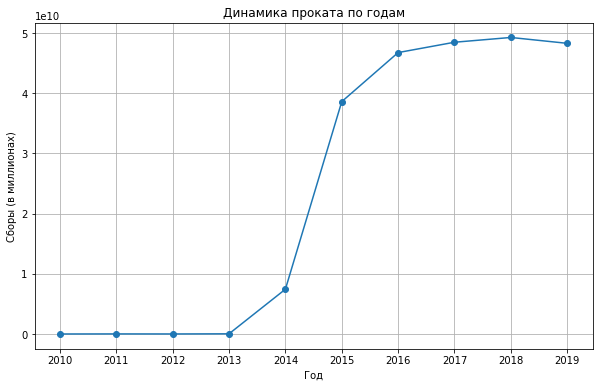

In [ ]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(annual_box_office['year'], annual_box_office['box_office'], marker='o')
plt.title('Динамика проката по годам')
plt.xlabel('Год')
plt.ylabel('Сборы (в миллионах)')
plt.grid(True)
plt.xticks(annual_box_office['year'])  # Убедитесь, что все годы отображаются на оси X
plt.show()

In [ ]:
data.groupby('year')['title'].count()

year
2010    976
2011    620
2012    592
2013    629
2014    804
2015    700
2016    814
2017    503
2018    875
2019    925
Name: title, dtype: int64

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [ ]:
# Создаем сводную таблицу
pivot_table = data.pivot_table(values='box_office', index='year', aggfunc=['mean', 'median'])

pivot_table.columns = ['Average Box Office', 'Median Box Office']

# Сбрасываем индексы для более удобного отображения
pivot_table = pivot_table.reset_index()

display(pivot_table)

,year,Average Box Office,Median Box Office
0,2010,2.313004e+04,1700.00
1,2011,1.293832e+05,3000.00
2,2012,5.441790e+04,5560.00
3,2013,1.619549e+05,3522.50
4,2014,2.674359e+07,18137.50
5,2015,8.390271e+07,4796668.30
6,2016,8.954429e+07,3777202.68
7,2017,1.365018e+08,9919415.00
8,2018,1.047914e+08,8821498.98
9,2019,9.126295e+07,4601033.60



 </font><font color='Blue'><b>Комментарий студента</b></font><br>


# Вывод

1. **Определение среднего и медианного значений**:
   - **Среднее значение** (Average Box Office) показывает общую тенденцию сбора фильмов за год и может быть искажено очень высокими значениями (высокобюджетные блокбастеры).
   - **Медиана** (Median Box Office) — это значение, которое делит данные пополам, и менее подвержено влиянию выбросов.

2. **Анализ данных**:
   - В 2010 году средний сбор составляет 23,130.04, а медиана — 1,700.00. Разница значительная, что может указывать на наличие фильмов с высокими сборами.
   - В 2011 и 2012 годах также наблюдается большая разница между средним и медианой, что подтверждает наличие высоких сборов.
   - Начиная с 2014 года, средние значения значительно возрастают, что может указывать на рост популярности фильмов или увеличение бюджетов.
   - В 2015 и 2016 годах медиана значительно ниже среднего, что говорит о том, что есть несколько фильмов с очень высокими сборами, которые влияют на среднее значение.
   - В 2017 и 2018 годах медиана начинает приближаться к среднему значению, что может указывать на более равномерное распределение сборов среди фильмов.

3. **Выводы**:
   - Разница между средней и медианной суммой сбора фильмов указывает на наличие выбросов в данных (фильмы с очень высокими сборами).
   - Высокие средние значения в последние годы могут свидетельствовать о росте индустрии кино и увеличении бюджетов на производство фильмов.
   - Медиана показывает более реалистичное представление о сборах большинства фильмов, в то время как среднее значение может вводить в заблуждение из-за влияния нескольких успешных картин.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [ ]:
pivot_table = data[data['year']>=2015].pivot_table(values='box_office', index='age_restriction', columns='year', aggfunc='sum', fill_value=0)
display(pivot_table)

year,2015,2016,2017,2018,2019
age_restriction,,,,,
0+ - для любой зрительской аудитории,3.790546e+08,1.500343e+08,2.295989e+08,3.244900e+07,1.774607e+07
12+ - для детей старше 12 лет,1.341951e+10,1.115076e+10,7.851428e+09,1.426725e+10,1.268020e+10
16+ - для детей старше 16 лет,1.084902e+10,1.659425e+10,1.869459e+10,1.627841e+10,1.275342e+10
18+ - запрещено для детей,5.430351e+09,6.793930e+09,9.651496e+09,8.760086e+09,1.012180e+10
6+ - для детей старше 6 лет,8.517312e+09,1.205315e+10,1.203103e+10,9.913759e+09,1.270494e+10


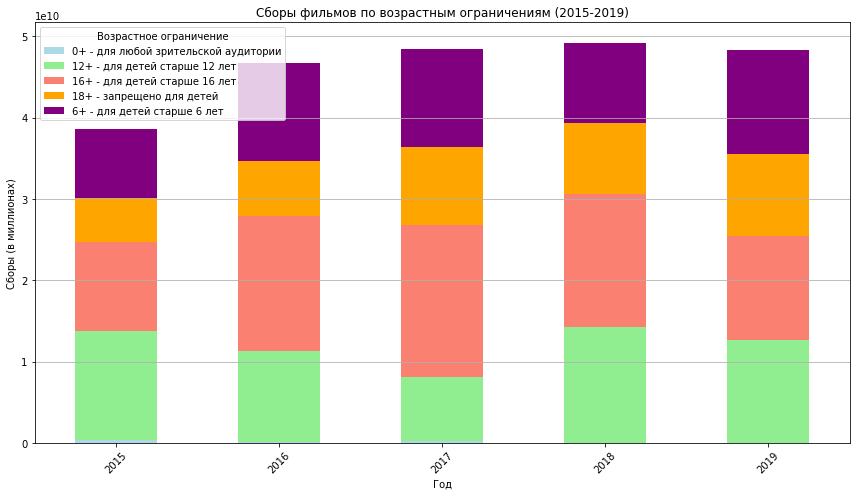

In [ ]:
# Группировка данных по возрастному ограничению и году, суммирование сборов
total_box_office = data[data['year']>=2015].groupby(['year', 'age_restriction'])['box_office'].sum().unstack()

# Построение гистограммы
total_box_office.plot(kind='bar', stacked=True, figsize=(12, 7), color=['lightblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.title('Сборы фильмов по возрастным ограничениям (2015-2019)')
plt.xlabel('Год')
plt.ylabel('Сборы (в миллионах)')
plt.xticks(rotation=45)
plt.legend(title='Возрастное ограничение')
plt.grid(axis='y')

# Показать график
plt.tight_layout()
plt.show()

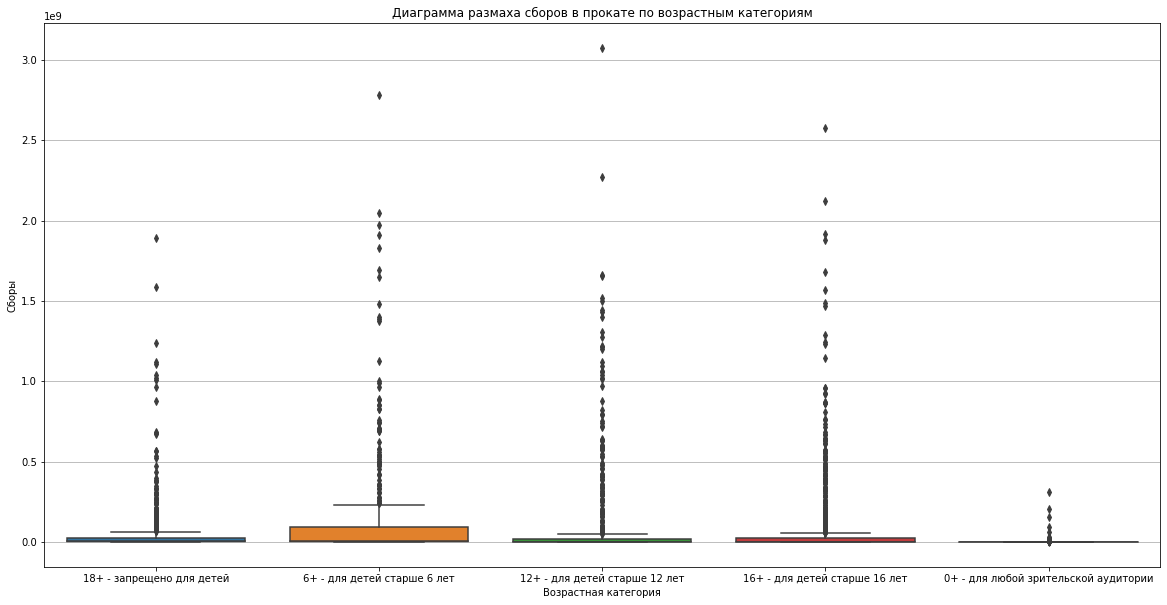

In [ ]:
# Построение диаграммы размаха
plt.figure(figsize=(20, 10))
sns.boxplot(x='age_restriction', y='box_office', data=data)
plt.title('Диаграмма размаха сборов в прокате по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Сборы')
plt.grid(axis='y')
plt.show()

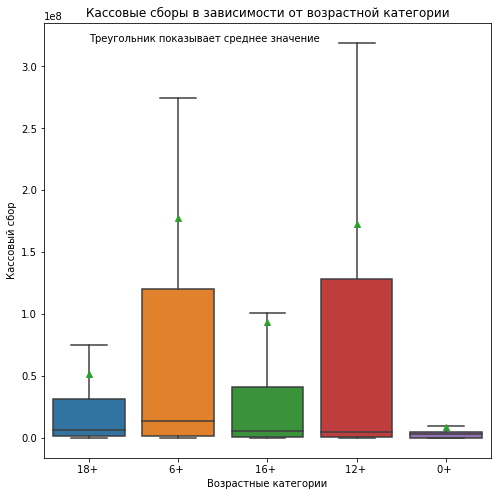

In [ ]:
# Комментарий ревьюера 3
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории',
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

# Вывод

1.Возрастное ограничение «16+»:
   - Это возрастное ограничение демонстрирует наибольшие сборы на протяжении всех лет, особенно заметно в 2015-2018 годах.

2. Возрастное ограничение «6+»:
   - Сборы фильмов с этой маркировкой также высоки, особенно в 2015-2017 годах, где сборы превышают 1 миллиарда.

3. Возрастное ограничение «12+»:
   - Сборы фильмов с этим ограничением значительно ниже по сравнению с «16+», но все же показывают положительную динамику, особенно в 2018 и 2019 годах, когда сборы превышают 1 миллиарда.

4. Возрастное ограничение «18+»:
   - Сборы для этого ограничения остаются относительно низкими, с максимальным значением около 200 миллионов в 2019 году. Это может указывать на меньшую аудиторию для фильмов с таким ограничением.

5. Возрастное ограничение «0+»:
   - Снижение интереса к фильмам для самой широкой аудитории.

Возрастные ограничения «16+» и «12+» явно являются наиболее успешными по сборам, что может говорить о том, что такие фильмы пользуются большим спросом среди зрителей.
Наблюдается общий рост сборов в период с 2015 по 2018 год, что может быть связано с увеличением производства высококачественного контента.
Данные показывают, что рынок фильмов ориентирован на более широкую аудиторию (фильмы для детей и подростков).


 </font><font color='Blue'><b>Комментарий студента</b></font><br>
 # Вывод
     Был проведен исследовательский анализ данных.  Наиболее полными представлены годы 2015-2017, где все фильмы имели данные о прокате (70% полнота). В эти годы информация о прокате была собрана почти полностью.В то же время, год 2010 имеет наименьшую долю фильмов с данными о прокате (10%), что может указывать на недостаток информации или на то, что не все фильмы были учтены в отчетах о прокате. Минимальные сборы по фильмам были в 2010.0 году:2 428 654.0. Максимальные сборы были  в 2018.0 году: 49 251 950 180.19999. Посчитали среднюю и медианную сумму сборов для каждого года. А также выяснили, что возрастные ограничения «16+» и «12+» явно являются наиболее успешными по сборам, что может говорить о том, что такие фильмы пользуются большим спросом среди зрителей.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Отфильтруем фильмы, оставим только те, которые получили гос. поддержку.

In [ ]:
data = data[data['refundable_support']+data['nonrefundable_support'] > 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 1281 to 7477
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   title                    316 non-null    object             
 1   puNumber                 316 non-null    int64              
 2   show_start_date          316 non-null    datetime64[ns, UTC]
 3   type                     316 non-null    object             
 4   film_studio              316 non-null    object             
 5   production_country       316 non-null    object             
 6   director                 316 non-null    object             
 7   producer                 314 non-null    object             
 8   age_restriction          316 non-null    object             
 9   refundable_support       316 non-null    float64            
 10  nonrefundable_support    316 non-null    float64            
 11  budget                   316

Посмотрим, сколько средств выделяется на поддержку кино.

In [ ]:
total_support = data['total_support'].sum()
average_support = data['total_support'].mean()

print(f"Общая сумма поддержки: {total_support}")
print(f"Средняя сумма поддержки на фильм: {average_support}")

Общая сумма поддержки: 18828718847.0
Средняя сумма поддержки на фильм: 59584553.31329114


Проведем анализ окупаемости фильмов.

In [ ]:
data = data[((~data['box_office'].isna())&(~data['total_support'].isna()))] #почистили данные, оставили фильмы с государственной поддержкой

In [ ]:
data_buget_not_null = data[~data['budget'].isna() & data['budget']>0].copy()
data_buget_not_null['profitability'] = data_buget_not_null['box_office'] / data_buget_not_null['budget']

print(data_buget_not_null['profitability'].describe())


count    301.000000
mean       0.763310
std        1.672880
min        0.000017
25%        0.022548
50%        0.148664
75%        0.783883
max       19.209804
Name: profitability, dtype: float64


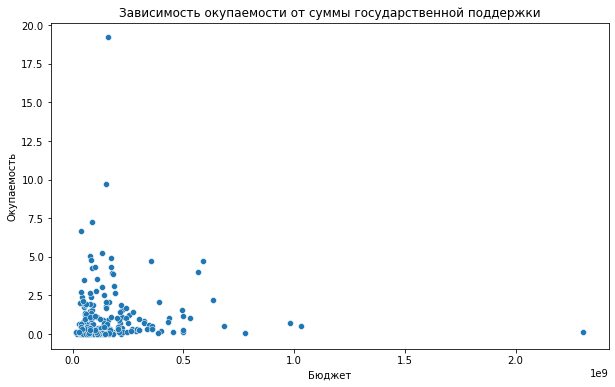

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='profitability', data=data_buget_not_null)
plt.title('Зависимость окупаемости от суммы государственной поддержки')
plt.xlabel('Бюджет')
plt.ylabel('Окупаемость')
plt.show()


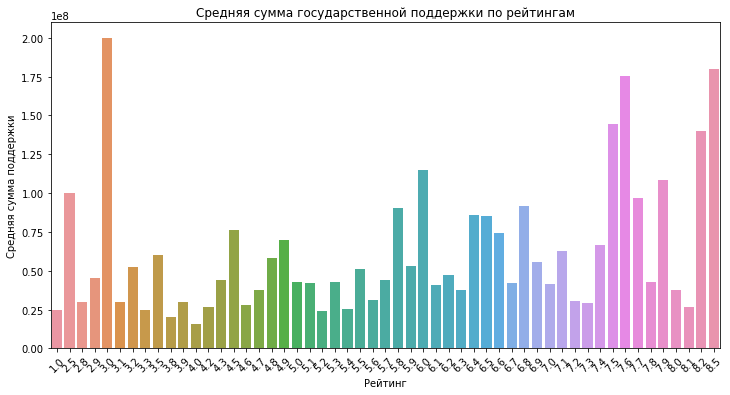

In [ ]:
# Группировка по рейтингам и средняя сумма поддержки
ratings_support = data.groupby('ratings')['total_support'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='ratings', y='total_support', data=ratings_support)
plt.title('Средняя сумма государственной поддержки по рейтингам')
plt.xlabel('Рейтинг')
plt.ylabel('Средняя сумма поддержки')
plt.xticks(rotation=45)
plt.show()


In [ ]:
ratings_support.rename(columns={'total_support': 'mean_support'}, inplace=True)

# Объединяем с исходным DataFrame
merged_data = pd.merge(data, ratings_support, on='ratings')

result = pd.DataFrame({
    'Title': merged_data['title'],
    'Ratings': merged_data['ratings'],
    'Total Support': merged_data['total_support']
})

# Сортируем по столбцу 'Ratings' в порядке убывания
sorted_result = result.sort_values(by='Ratings', ascending=False)


display(sorted_result)

,Title,Ratings,Total Support
32,А зори здесь тихие...,8.5,150000000.0
33,БОЛЬШОЙ,8.5,210000000.0
285,Миллиард,8.2,140000000.0
0,Пока еще жива,8.1,26500000.0
277,Мотылк.,8.0,37346881.0
...,...,...,...
266,Спасти Пушкина,2.9,40000000.0
265,Крым (2017),2.9,50123915.0
247,Богатырша,2.8,30000000.0
284,Крымский мост. Сделано с любовью,2.5,100000000.0


Есть  фильмы, которые окупились по рейтингам. Однако есть и фильмы, которые совсем не понравились зрителям, хоть и на них потратили много средств.

<AxesSubplot:ylabel='age_restriction'>

count      5.000000
mean      60.400000
std       45.823575
min        5.000000
25%       27.000000
50%       59.000000
75%       97.000000
max      114.000000
Name: age_restriction, dtype: float64

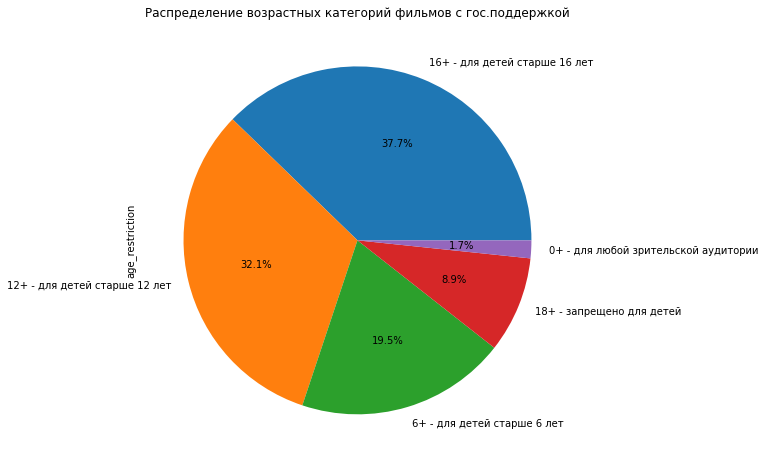

In [ ]:
# Посмотрим, для каких возрастных категорий снимают фильмы с гос.поддержкой:
display(data['age_restriction'].value_counts().plot(y='count', kind='pie', figsize=(8, 8),autopct='%1.1f%%'))
plt.title('Распределение возрастных категорий фильмов с гос.поддержкой')
data['age_restriction'].value_counts().describe()

Большинство фильмов были сняты для аудитории 16+.

In [ ]:
# Разделение жанров и создание нового DataFrame
genre_exploded = data['genres'].str.split(', ').explode()

# Подсчет количества фильмов по каждому жанру
genre_counts = genre_exploded.value_counts()

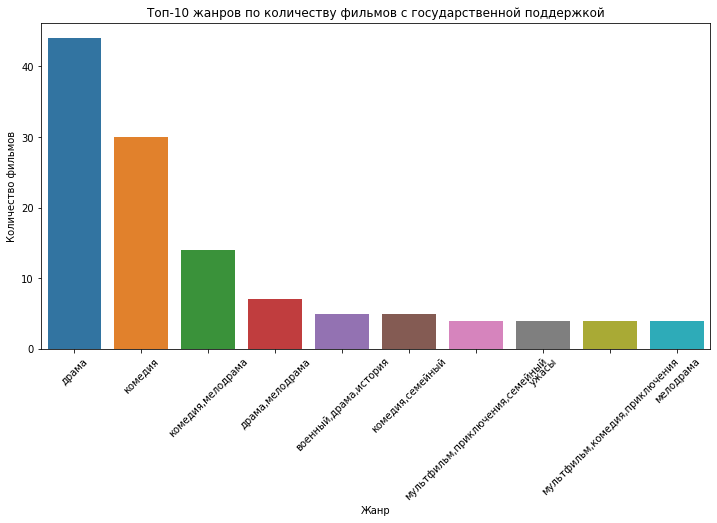

In [ ]:
top_genres = genre_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Топ-10 жанров по количеству фильмов с государственной поддержкой')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()



Наиболее популярный жанр с гос. поддержкой это драмы.

In [ ]:
successful_films = data_buget_not_null[data_buget_not_null['profitability'] > 1.2] # более 1.2, так как окупаемость в хорошем случае должна быть больше 20%.
unsuccessful_films = data_buget_not_null[data_buget_not_null['profitability'] <= 1.2]

print(f"Количество успешных фильмов: {len(successful_films)}")
print(f"Количество неуспешных фильмов: {len(unsuccessful_films)}")
successful_films.head()

Количество успешных фильмов: 54
Количество неуспешных фильмов: 247


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,year,director_first,genres_first,total_support,%_total_support,%_refundable_support,%_nonrefundable_support,profitability
1902,Призрак.,111001815,2015-03-02 12:00:00+00:00,Художественный,ООО Водород 2011,Россия,А.Войтинский,С.Сельянов,6+ - для детей старше 6 лет,0.0,...,"триллер,боевик,приключения",352804320.4,2015,А.Войтинский,триллер,75000000.0,0.537436,0.000000,0.537436,2.528130
1986,Елки Лохматые,111023114,2014-12-10 12:00:00+00:00,Художественный,ООО ТаББаК,Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",6+ - для детей старше 6 лет,26000000.0,...,"семейный,комедия",121225633.8,2014,Максим Свешников,семейный,56000000.0,0.700000,0.325000,0.375000,1.515320
2004,Снежная Королева 2 Перезаморозка,114000214,2014-11-13 12:00:00+00:00,Анимационный,ООО ВИЗАРТ ФИЛЬМ,Россия,А.Цицилин,"ООО ВИЗАРТ ФИЛЬМ, ООО ТаББаК",0+ - для любой зрительской аудитории,30000000.0,...,"мультфильм,фэнтези,приключения",313489846.5,2014,А.Цицилин,мультфильм,70000000.0,0.277239,0.118817,0.158422,1.241595
2131,Битва за Севастополь,111001415,2015-02-20 12:00:00+00:00,Художественный,"ООО Кинокомпания Новые люди, ООО Студия Кинодел",Россия-Украина,С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",12+ - для детей старше 12 лет,0.0,...,"биография,военный,драма",401804461.9,2015,С.Мокрицкий,биография,27510000.0,0.210000,0.000000,0.210000,3.067210
2204,8 новых свиданий,111014914,2014-10-30 12:00:00+00:00,Художественный,ООО Смарт ТВ Продакшн,Россия,М.Бальчюнас,"ООО Грин Филмс, ООО ПЦ Горад",12+ - для детей старше 12 лет,0.0,...,комедия,393344626.3,2014,М.Бальчюнас,комедия,30000000.0,0.387588,0.000000,0.387588,5.081857


In [ ]:
successful_films['genres'].value_counts()[:10]

комедия                            14
комедия,мелодрама                   5
драма                               4
мультфильм,приключения,семейный     4
семейный,комедия                    2
военный,драма,история               2
спорт,драма                         2
мультфильм,приключения,комедия      1
драма,боевик                        1
комедия,семейный,фантастика         1
Name: genres, dtype: int64

# Вывод
Исследовали фильмы, которые получили государственную поддержку. Общая сумма гос. поддержки: 18 828 718 847.0
Средняя сумма поддержки на фильм: 59 584 553.31329114. Провели анализ окупаемости фильмов.Большинство фильмов  с гос. поддержкой были сняты для аудитории 16+. Наиболее популярный жанр с гос. поддержкой это драмы. Количество успешных фильмов: 54 из 316, у которых окупаемость была более 20 %.

### Шаг 5. Напишите общий вывод

### Выводы о прокатных удостоверениях, сборах и государственной поддержке фильмов

Данные о фильмах были представлены в двух файлах. Объединили два файла по столбцу puNumber. Заполнили пропущенные значение в refundable_support и nonrefundable_support 0. Удалили строки с неизвестными значениями в столбцах  film_studio, production_country, director. Остальные столбцы оставили без изменений. Удалили явные дубликаты. А также дубликаты, у которых был одинаковый puNumber.  Также были добавлены новые столбцы с годом,с именем главного режиссера и с долью государственной поддержки от общего бюджета фильма. Были удалены лишние пробелы в столбцах с категориальнами признаками. Были удалены фильмы, у которых бюджет был равен 0, когда refundable_support был больше 0, так как в бюджет уже входит это сумма. В среднем за год в прокат выходило около  678 фильмов за период 2010-2019 год. Минимальное количество фильмов было зафиксировано в 2011 году 475, а максимальное – в 2019 году (914 фильмов). Из этих фильмов -316 фильмов получили гос. поддержку.  Минимальные сборы  были в 2010.0 году: 2 428 654. Максимальные сборы в 2018.0 году: 49 251 950 180.


Был проведен исследовательский анализ данных.  Наиболее полными представлены годы 2015-2017, где все фильмы имели данные о прокате (70% полнота). В эти годы информация о прокате была собрана почти полностью.В то же время, год 2010 имеет наименьшую долю фильмов с данными о прокате (10%), что может указывать на недостаток информации или на то, что не все фильмы были учтены в отчетах о прокате. Посчитали среднюю и медианную сумму сборов для каждого года. А также выяснили, что возрастные ограничения «16+» и «12+» явно являются наиболее успешными по сборам, что может говорить о том, что такие фильмы пользуются большим спросом среди зрителей.


Существует связь между возрастной категорией фильмов и их кассовыми сборами. Фильмы категории 0+ почти не достигают значительных сборов, а фильмы с рейтингом 18+ обычно собирают меньше, чем картины категорий 6+/12+/16+. Это может быть связано с тем, что фильмы для более младшей аудитории смотрят вместе с родителями, тогда как фильмы для взрослых ориентированы только на совершеннолетних зрителей. Общая сумма гос. поддержки: 18 828 718 847. Средняя сумма гос. поддержки на фильм: 59 584 553. Большинство фильмов с гос.поддержкой были сняты для аудитории 16+. Наиболее большая окупаемость фильма равна 19, то есть фильм окупился в 19 раз.  Количество успешных фильмов - 54, это фильмы с окупаемостью более 20%. Наиболее популярный жанр с гос. поддержкой это драмы. Фильмы с рейтингом больше 8.0, у которых была гос. поддержка: А зори здесь тихие...,БОЛЬШОЙ, Миллиард, Пока еще жива.
